preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.288   33  tested_positive
   preg  plas  pres  skin  insu  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


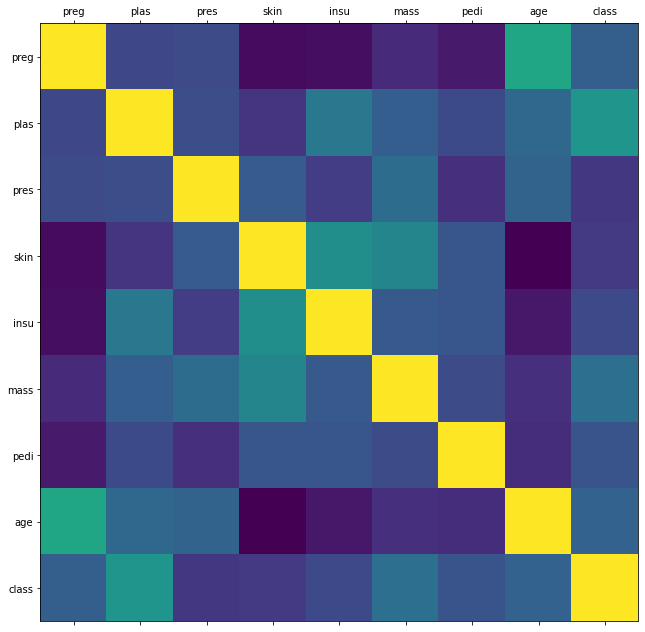

In [1]:
import pandas as pd
import numpy as np
import diabetes as db
import diabetes_train as tt
from sklearn import metrics

diabetes_data = db.read_csv('diabetes.csv')
print(diabetes_data.head())

diabetes_data = db.negative_positive(diabetes_data)
print(diabetes_data.head()) 

db.plot_corr(diabetes_data)



In [2]:
X_train, X_test, y_train,y_test = tt.train_data(diabetes_data)
print("{0:0.2f}% in training set".format((len(X_train)/len(diabetes_data.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(diabetes_data.index)) * 100))

69.92% in training set
30.08% in test set


In [3]:
diabetes_data = tt.impute_with_mean(X_train, X_test)
print(diabetes_data)

(array([[  1.        ,  95.        ,  60.        , ...,  23.9       ,
          0.26      ,  22.        ],
       [  5.        , 105.        ,  72.        , ...,  36.9       ,
          0.159     ,  28.        ],
       [  4.34056399, 135.        ,  68.        , ...,  42.3       ,
          0.365     ,  24.        ],
       ...,
       [ 10.        , 101.        ,  86.        , ...,  45.6       ,
          1.136     ,  38.        ],
       [  4.34056399, 141.        ,  72.24131274, ...,  42.4       ,
          0.205     ,  29.        ],
       [  4.34056399, 125.        ,  96.        , ...,  22.5       ,
          0.262     ,  21.        ]]), array([[6.00000000e+00, 9.80000000e+01, 5.80000000e+01, ...,
        3.40000000e+01, 4.30000000e-01, 4.30000000e+01],
       [2.00000000e+00, 1.12000000e+02, 7.50000000e+01, ...,
        3.57000000e+01, 1.48000000e-01, 2.10000000e+01],
       [2.00000000e+00, 1.08000000e+02, 6.40000000e+01, ...,
        3.08000000e+01, 1.58000000e-01, 2.10000000e+

In [3]:
nb_model = tt.naive_bayes(X_train, y_train)
print(nb_model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [4]:

nb_predict_train_model = tt.models_acuracy(X_train, nb_model)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,nb_predict_train_model)))


Accuracy: 0.7672


In [5]:
nb_predict_train_X_test = tt.models_acuracy_X_Test(y_test, nb_model)
print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_train_X_test)))

Accuracy:0.6537
